<a href="https://colab.research.google.com/github/vijipandian/project/blob/main/premium_subscription_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/content/synthetic_premium_dataset.csv")
data.head(2)

,age,monthly_income,website_visits,time_spent_minutes,previous_purchases,is_student,country,device_type,purchased
0,56,1638.553977,8,16.728722,1,0,TR,Desktop,1
1,46,2499.096428,6,13.626011,2,0,NL,Tablet,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 10000 non-null  int64  
 1   monthly_income      10000 non-null  float64
 2   website_visits      10000 non-null  int64  
 3   time_spent_minutes  10000 non-null  float64
 4   previous_purchases  10000 non-null  int64  
 5   is_student          10000 non-null  int64  
 6   country             10000 non-null  object 
 7   device_type         10000 non-null  object 
 8   purchased           10000 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 703.3+ KB


In [4]:
data.isnull().sum()

,0
age,0
monthly_income,0
website_visits,0
time_spent_minutes,0
previous_purchases,0
is_student,0
country,0
device_type,0
purchased,0


In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
unique=pd.DataFrame({
    "Columns":data.columns,
    "Unique Values":[data[col].unique() for col in data.columns]
})

print("Age:",data["age"].nunique())
#print(data['age'].value_counts())
print("*********************")

print("monthly_income:",data["monthly_income"].nunique())
#print(data['monthly_income'].value_counts())
print("*********************")


print("website_visits:",data["website_visits"].nunique())
#print(data['website_visits'].value_counts())
print("*********************")

print("time_spent_minutes:",data["time_spent_minutes"].nunique())
#print(data['time_spent_minutes'].value_counts())
print("*********************")

print("previous_purchases:",data["previous_purchases"].nunique())
print(data['previous_purchases'].value_counts())
print("*********************")

print("is_student:",data["is_student"].nunique())
print(data['is_student'].value_counts())
print("*********************")

print("country:",data["country"].nunique())
print(data['country'].value_counts())
print("*********************")

print("device_type:",data["device_type"].nunique())
print(data['device_type'].value_counts())
print("*********************")


print("purchased:",data["purchased"].nunique())
print(data['purchased'].value_counts())
print("*********************")

Age: 47
*********************
monthly_income: 9786
*********************
website_visits: 26
*********************
time_spent_minutes: 9971
*********************
previous_purchases: 11
previous_purchases
3     2256
2     2221
4     1715
1     1457
5     1028
0      501
6      483
7      214
8       98
9       18
10       9
Name: count, dtype: int64
*********************
is_student: 2
is_student
0    7031
1    2969
Name: count, dtype: int64
*********************
country: 4
country
DE    2563
NL    2523
FR    2496
TR    2418
Name: count, dtype: int64
*********************
device_type: 3
device_type
Mobile     3376
Tablet     3340
Desktop    3284
Name: count, dtype: int64
*********************
purchased: 2
purchased
1    7932
0    2068
Name: count, dtype: int64
*********************


In [7]:
data.describe()

,age,monthly_income,website_visits,time_spent_minutes,previous_purchases,is_student,purchased
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,41.054000,4011.548809,10.038500,15.031669,3.009900,0.296900,0.793200
std,13.484104,1467.782573,3.197912,5.010769,1.723281,0.456915,0.405031
min,18.000000,1000.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,2974.139231,8.000000,11.700613,2.000000,0.000000,1.000000
50%,41.000000,3996.377858,10.000000,15.018620,3.000000,0.000000,1.000000
75%,53.000000,5005.978546,12.000000,18.364640,4.000000,1.000000,1.000000
max,64.000000,9399.200171,27.000000,32.871504,10.000000,1.000000,1.000000


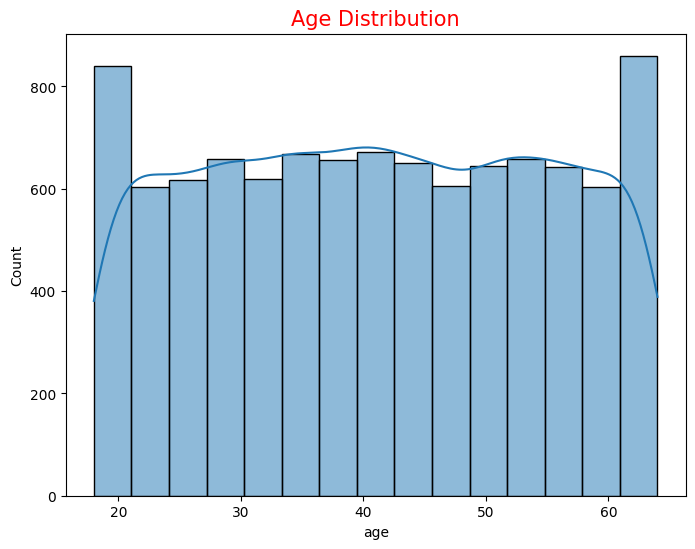

In [8]:
plt.figure(figsize=(8,6))
sns.histplot(data['age'],kde=True,bins=15)
plt.title("Age Distribution",fontsize=15,color="red")
plt.show()

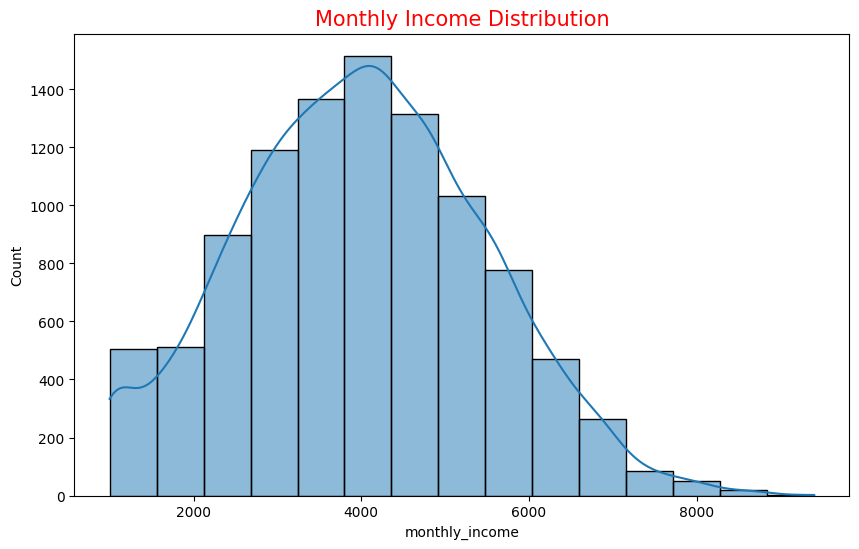

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(data['monthly_income'],kde=True,bins=15)
plt.title("Monthly Income Distribution",fontsize=15,color="red")
plt.show()

In [10]:
dev=data.groupby("device_type")["monthly_income"].mean()
dev

,monthly_income
device_type,
Desktop,4037.197896
Mobile,4030.025128
Tablet,3967.654303


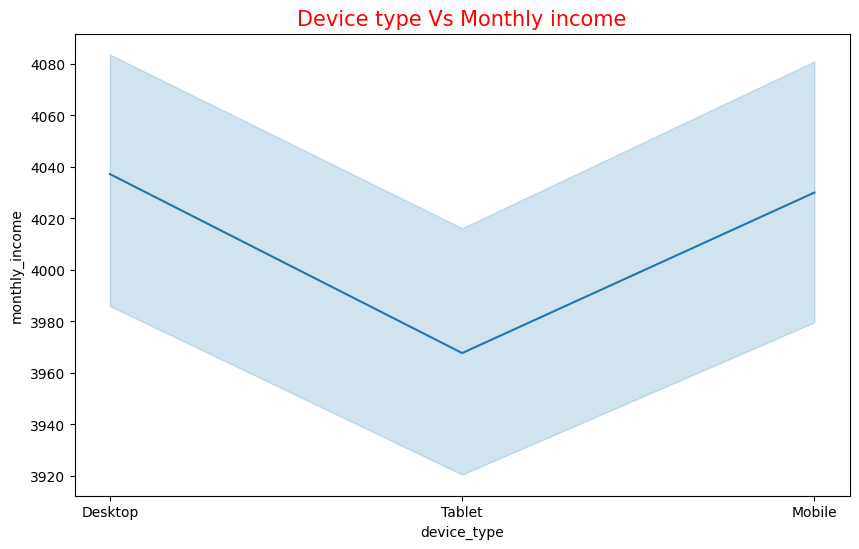

In [11]:
plt.figure(figsize=(10,6))
sns.lineplot(x="device_type",y="monthly_income",data=data)
plt.title("Device type Vs Monthly income",fontsize=15,color="red")
plt.show()

In [12]:
data.groupby("country").count()

,age,monthly_income,website_visits,time_spent_minutes,previous_purchases,is_student,device_type,purchased
country,,,,,,,,
DE,2563,2563,2563,2563,2563,2563,2563,2563
FR,2496,2496,2496,2496,2496,2496,2496,2496
NL,2523,2523,2523,2523,2523,2523,2523,2523
TR,2418,2418,2418,2418,2418,2418,2418,2418


<Figure size 1000x600 with 0 Axes>

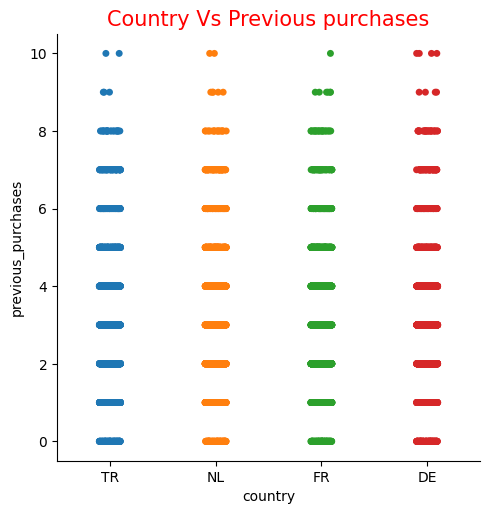

In [13]:
plt.figure(figsize=(10,6))
sns.catplot(x="country",y="previous_purchases",data=data,hue="country")
plt.title("Country Vs Previous purchases",fontsize=15,color="red")
plt.show()

In [14]:
dt=data.groupby("device_type").agg({
    "monthly_income":"mean",
    "website_visits":"sum",
    "previous_purchases":"median"
}).reset_index()

<Figure size 1000x600 with 0 Axes>

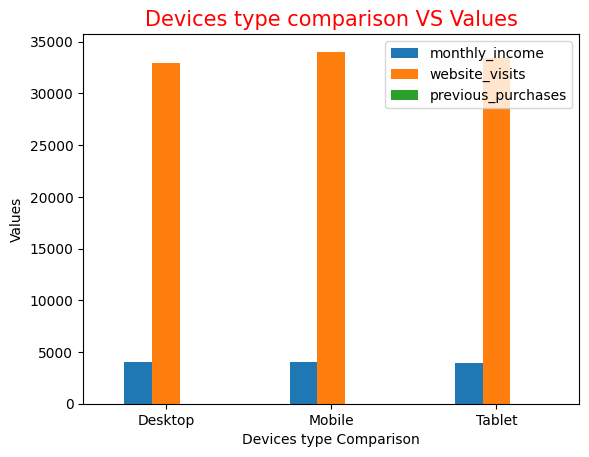

In [15]:
plt.figure(figsize=(10,6))
dt.plot(x="device_type",kind="bar")
plt.ylabel("Values")
plt.xlabel("Devices type Comparison")
plt.title("Devices type comparison VS Values",fontsize=15,color="red")
plt.xticks(rotation=0)
plt.show()

<Axes: ylabel='device_type'>

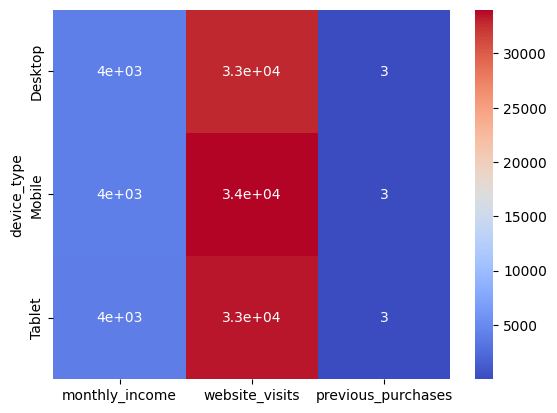

In [16]:
sns.heatmap(dt.set_index("device_type"),annot=True,cmap="coolwarm")

**ML**

In [17]:
data['country'].unique()

array(['TR', 'NL', 'FR', 'DE'], dtype=object)

In [18]:
data['country'].value_counts()

,count
country,
DE,2563
NL,2523
FR,2496
TR,2418


In [19]:
data['country']=data['country'].map({"DE":1,"NL":2,"FR":3,"TR":4})

In [20]:
data['device_type'].value_counts()

,count
device_type,
Mobile,3376
Tablet,3340
Desktop,3284


In [21]:
data["device_type"]=data['device_type'].map({"Mobile":1,"Tablet":2,"Desktop":3})

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [23]:
x=data.drop("purchased",axis=1)
y=data["purchased"]

In [24]:
scaler=StandardScaler()
scaled=scaler.fit_transform(x)

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 8)
(2000, 8)
(8000,)
(2000,)


**LogisticRegression**

In [27]:
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
y_pred=model.predict(x_test)

In [36]:
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Precision:", precision_score(y_test,y_pred))
print("Recall:", recall_score(y_test,y_pred))
print("F1:", f1_score(y_test,y_pred))

Accuracy: 0.797
Precision: 0.797
Recall: 1.0
F1: 0.8870339454646633


**RandomForestClassifier**

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
model1=RandomForestClassifier()
model1.fit(x_train,y_train)

RandomForestClassifier()

In [37]:
y_pre=model1.predict(x_test)

In [38]:
print("Accuracy:", accuracy_score(y_test,y_pre))
print("Precision:", precision_score(y_test,y_pre))
print("Recall:", recall_score(y_test,y_pre))
print("F1:", f1_score(y_test,y_pre))

Accuracy: 0.7925
Precision: 0.7969773299748111
Recall: 0.9924717691342535
F1: 0.8840458228555462
